In [1]:
import typing as T
from model.model import CoralModel
from config.config import Config
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def create_model(checkpoint_path: str, config: Config) -> T.Optional[CoralModel]:
    if not checkpoint_path:
        return None
    model = CoralModel.load_from_checkpoint(checkpoint_path, config=config)
    model.eval()
    return model

In [8]:
path = "/media/cedric/Storage1/coral_data/logs/lightning_logs/version_14/checkpoints/0010.ckpt"
model = create_model(checkpoint_path=path, config=Config())



In [9]:
model.device

device(type='cuda', index=0)

In [10]:
path = "/media/cedric/Storage1/coral_data/dataset/train/T1_22.12.06/00002.png"
image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
image = torch.from_numpy(image)
image = image.permute(2, 0, 1)
image = image[:3, ...]
image = image.float() / 255.0
pred = model.get_pred(image)
pred_np = pred.detach().cpu().permute(1, 2, 0).numpy()
pred_np = (pred_np * 255).astype(np.uint8)


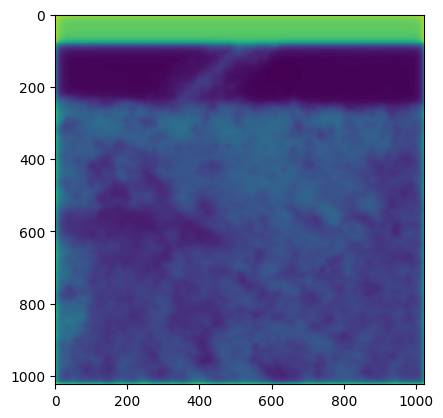

(1024, 1024, 1)
18
122


In [11]:
plt.imshow(pred_np)
plt.show()
print(pred_np.shape)
print(pred_np.min())
print(pred_np.max())
